<a href="https://colab.research.google.com/github/Jeevan-hub1/-Conduct-Hypothesis-Tests-and-Statistical-Summary-on-a-Business-Dataset/blob/main/Startup_Investment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🦈 SHARK TANK INVESTMENT ANALYSIS 🦈
India Data loaded: 117 records
Data validation failed: Missing required column for Funding_Asked
Using sample data instead.
Total combined data: 1000 records
Cleaning data...
Removed 0 duplicates
Data cleaning completed!
=== SHARK TANK INVESTMENT ANALYSIS - BASIC STATISTICS ===

Total Deals Analyzed: 1,000
Successful Deals: 733
Overall Success Rate: 73.3%

Average Funding Asked: $66,739,116
Average Funding Received: $63,636,350
Total Funding Deployed: $46,645,444,570

=== TOP INDUSTRIES BY DEAL COUNT ===
Beauty: 111 deals
Fashion: 105 deals
Technology: 105 deals
Food & Beverage: 103 deals
Home & Garden: 103 deals
Finance: 100 deals
Entertainment: 96 deals
Education: 95 deals
Health & Fitness: 91 deals
Automotive: 91 deals

=== INDUSTRY-WISE ANALYSIS ===

Industry Performance Ranking:
                   Total_Deals  Successful_Deals  Success_Rate  Avg_Funding_Received  Avg_Funding_Asked
Industry_Category                                                 

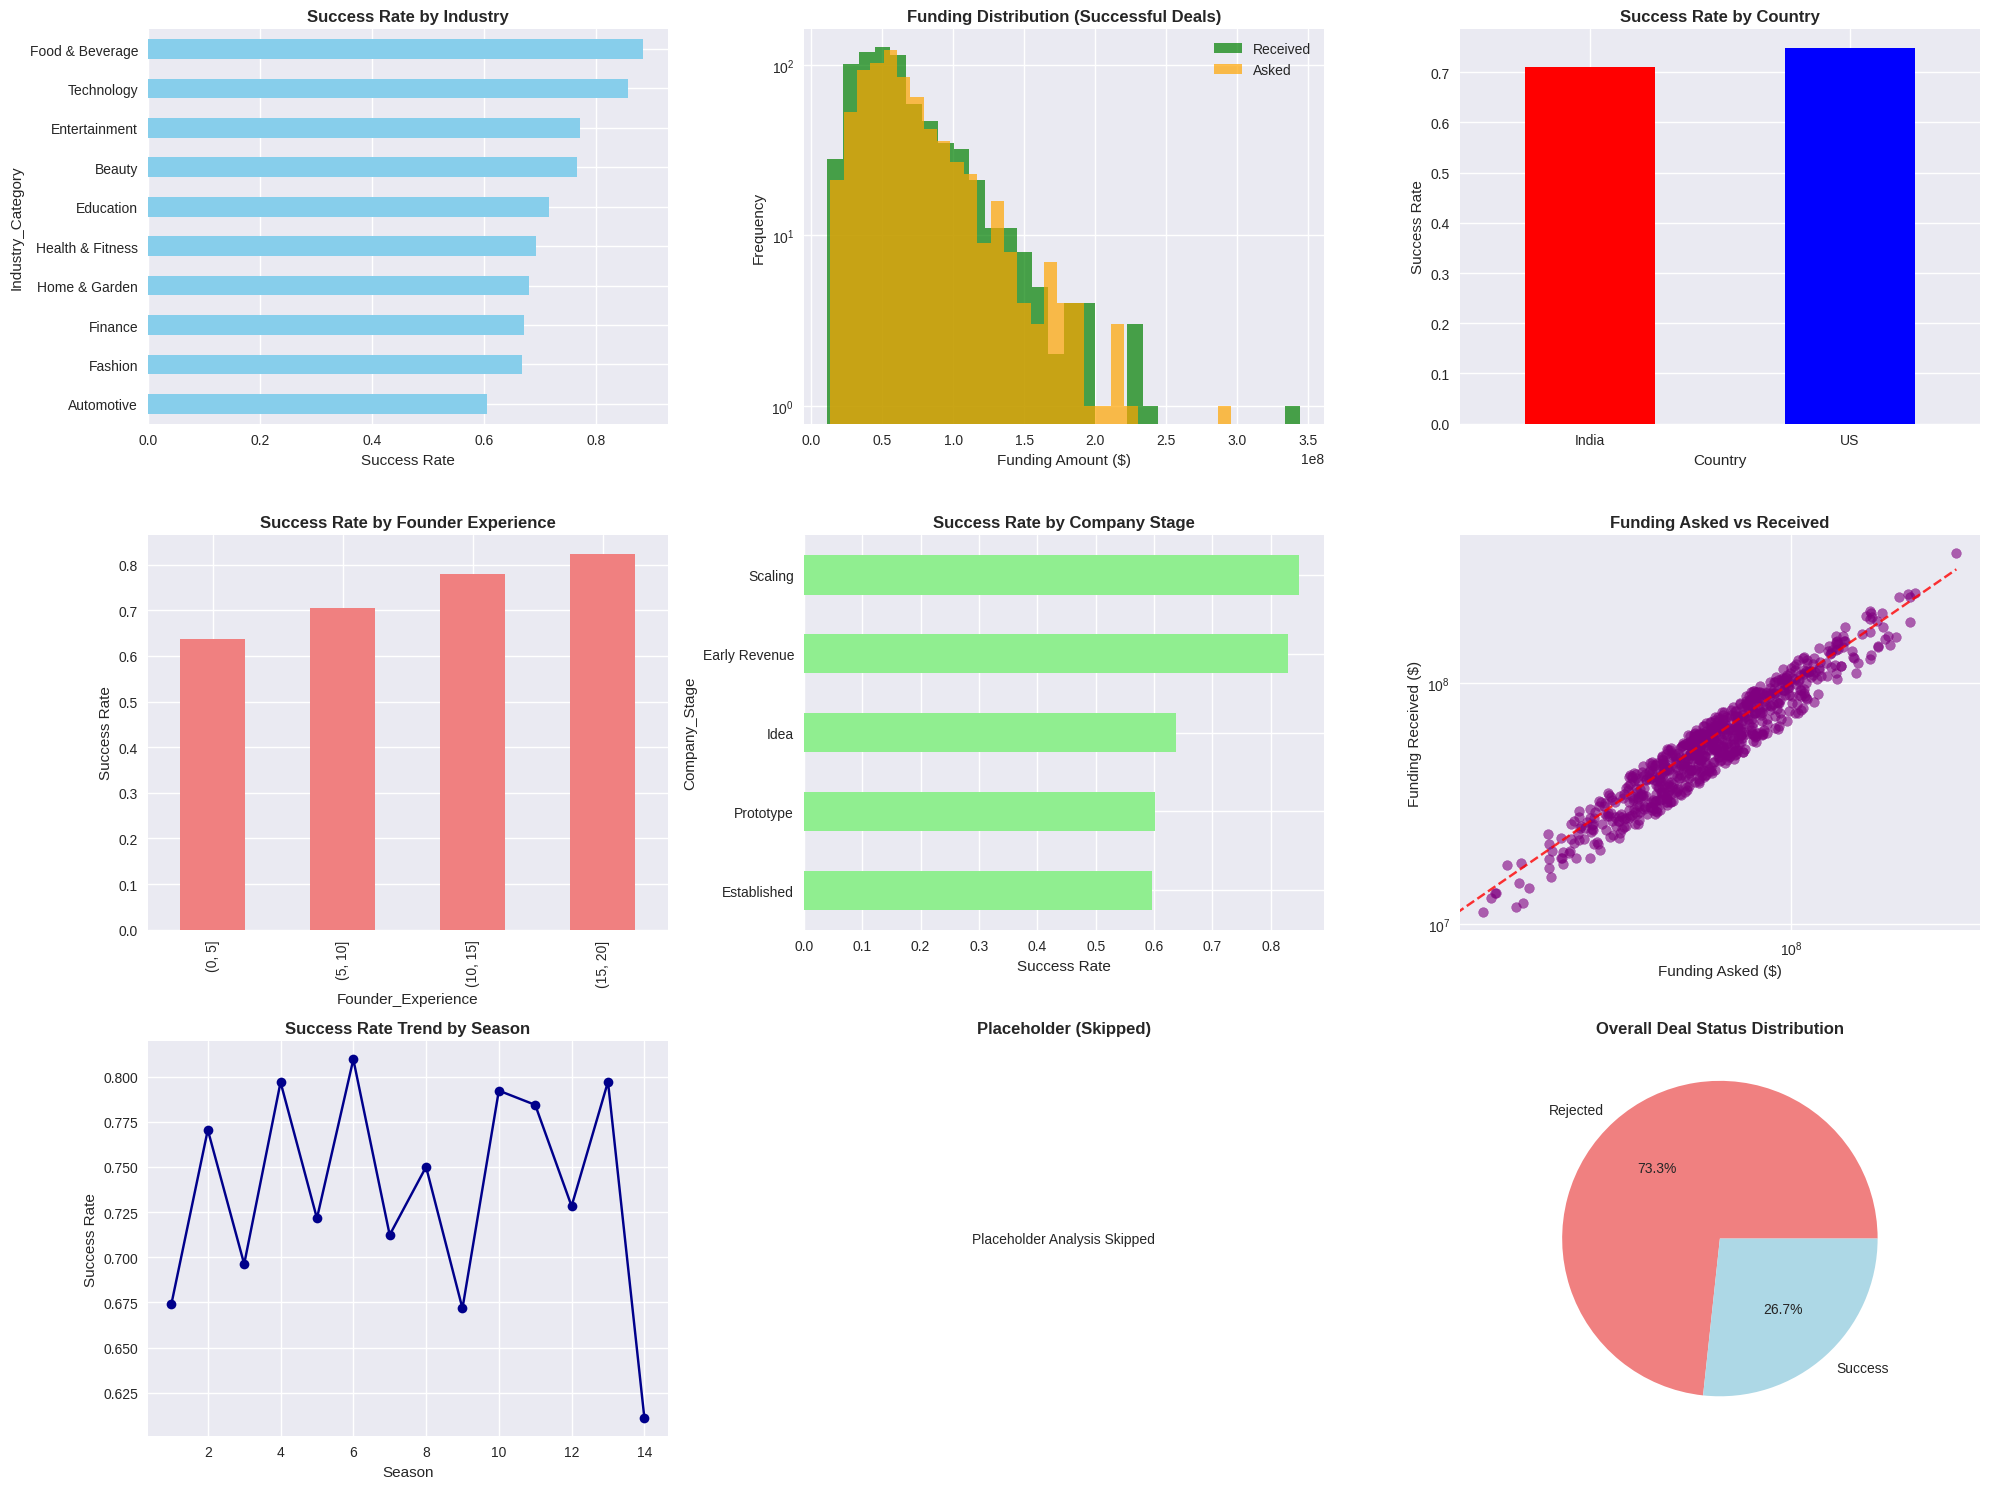

Visualizations saved as 'shark_tank_analysis_dashboard.png'

=== ADVANCED ANALYTICS & PREDICTIVE MODELING ===

Random Forest Accuracy: 0.789
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Top Feature Importances:
                         feature  importance
                   Pitch_Quality    0.071763
           Company_Stage_encoded    0.065720
                 Pitch_Quality^2    0.064774
Founder_Experience Pitch_Quality    0.058113
              Founder_Experience    0.053073
       Industry_Category_encoded    0.048699
                 Funding_Asked^2    0.047649
   Funding_Asked Valuation_Asked    0.047132
     Funding_Asked Pitch_Quality    0.046187
            Founder_Experience^2    0.040807

XGBoost Accuracy: 0.803
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84 

In [24]:
# Shark Tank Investment Analysis - Complete Python Implementation
# Author: Data Analysis Team
# Date: 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import logging

warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(filename='shark_tank_errors.log', level=logging.ERROR)

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class SharkTankAnalyzer:
    def __init__(self):
        self.data = None
        self.us_data = None
        self.india_data = None
        self.le = LabelEncoder()
        self.column_mapping = {
            'Funding_Asked': ['pitcher_ask_amount', 'ask_amount'],
            'Funding_Received': ['deal_amount', 'funding_received'],
            'Valuation_Asked': ['ask_valuation', 'valuation_ask'],
            'Valuation_Given': ['deal_valuation', 'valuation_given'],
            'Industry_Category': ['industry', 'idea', 'category'],
            'Season_Episode': ['episode_number', 'season_episode'],
            'deal': ['deal', 'deal_status'],
            'Country': ['Country', 'country']
        }

    def validate_data(self, df):
        """Validate that required columns exist in the dataset"""
        required_columns = ['Funding_Asked', 'Funding_Received', 'deal']
        mapped_columns = []
        for col in required_columns:
            found_col = next((c for c in self.column_mapping[col] if c in df.columns), None)
            if not found_col:
                return False, f"Missing required column for {col}"
            mapped_columns.append(found_col)
        return True, mapped_columns

    def load_data(self, us_file_path=None, india_file_path=None):
        """Load and combine Shark Tank US and India datasets"""
        try:
            if us_file_path:
                self.us_data = pd.read_csv(us_file_path)
                self.us_data['Country'] = 'US'
                print(f"US Data loaded: {len(self.us_data)} records")
            if india_file_path:
                self.india_data = pd.read_csv(india_file_path)
                self.india_data['Country'] = 'India'
                print(f"India Data loaded: {len(self.india_data)} records")

            if self.us_data is not None and self.india_data is not None:
                self.data = pd.concat([self.us_data, self.india_data], ignore_index=True)
            elif self.us_data is not None:
                self.data = self.us_data.copy()
            elif self.india_data is not None:
                self.data = self.india_data.copy()
            else:
                print("No data files provided. Using sample data.")
                self.data = self.create_sample_data()

            # Map columns to standard names
            for standard_col, possible_cols in self.column_mapping.items():
                for col in possible_cols:
                    if col in self.data.columns:
                        self.data = self.data.rename(columns={col: standard_col})
                        break

            # Validate data
            is_valid, message = self.validate_data(self.data)
            if not is_valid:
                print(f"Data validation failed: {message}")
                print("Using sample data instead.")
                self.data = self.create_sample_data()

            print(f"Total combined data: {len(self.data)} records")
            return self.data

        except Exception as e:
            logging.error(f"Error loading data: {e}")
            print(f"Error loading data: {e}. Using sample data.")
            self.data = self.create_sample_data()
            return self.data

    def create_sample_data(self):
        """Create sample Shark Tank data with stronger feature-outcome relationships"""
        np.random.seed(42)
        n_samples = 1000
        industries = ['Technology', 'Food & Beverage', 'Fashion', 'Health & Fitness',
                     'Education', 'Home & Garden', 'Automotive', 'Beauty', 'Entertainment', 'Finance']
        countries = ['US', 'India']
        stages = ['Idea', 'Prototype', 'Early Revenue', 'Scaling', 'Established']

        data = {
            'Company_Name': [f'Company_{i}' for i in range(n_samples)],
            'Season_Episode': np.random.randint(1, 15, n_samples),
            'Industry_Category': np.random.choice(industries, n_samples),
            'Funding_Asked': np.random.lognormal(11, 0.5, n_samples).astype(int) * 1000,
            'Valuation_Asked': np.random.lognormal(13, 0.5, n_samples).astype(int) * 1000,
            'Company_Stage': np.random.choice(stages, n_samples, p=[0.1, 0.25, 0.35, 0.2, 0.1]),
            'Country': np.random.choice(countries, n_samples, p=[0.6, 0.4]),
            'Founder_Experience': np.random.randint(1, 20, n_samples),  # Years of experience
            'Pitch_Quality': np.random.uniform(0, 10, n_samples)  # Simulated pitch score
        }

        df = pd.DataFrame(data)
        # Stronger relationship between features and deal outcome
        success_prob = 0.3
        prob_adjustments = (
            (df['Industry_Category'].isin(['Technology', 'Food & Beverage'])) * 0.3 +
            (df['Company_Stage'].isin(['Early Revenue', 'Scaling'])) * 0.3 +
            (df['Funding_Asked'] < df['Funding_Asked'].quantile(0.5)) * 0.2 +
            (df['Founder_Experience'] > 10) * 0.2 +
            (df['Pitch_Quality'] > 7) * 0.25
        )
        final_prob = np.clip(success_prob + prob_adjustments, 0, 0.95)  # Cap at 95%
        df['deal'] = np.random.binomial(1, final_prob, n_samples)

        df['Funding_Received'] = 0
        successful_deals = df['deal'] == 1
        df.loc[successful_deals, 'Funding_Received'] = (
            df.loc[successful_deals, 'Funding_Asked'] * np.random.uniform(0.7, 1.2, successful_deals.sum())
        ).astype(int)

        df['Valuation_Given'] = 0
        df.loc[successful_deals, 'Valuation_Given'] = (
            df.loc[successful_deals, 'Valuation_Asked'] * np.random.uniform(0.5, 1.0, successful_deals.sum())
        ).astype(int)

        return df

    def clean_data(self):
        """Clean and preprocess the data"""
        if self.data is None:
            print("No data loaded. Please load data first.")
            return None

        print("Cleaning data...")
        initial_len = len(self.data)
        self.data = self.data.drop_duplicates()
        print(f"Removed {initial_len - len(self.data)} duplicates")

        numeric_columns = ['Funding_Asked', 'Funding_Received', 'Valuation_Asked', 'Valuation_Given', 'Founder_Experience', 'Pitch_Quality']
        for col in numeric_columns:
            if col in self.data.columns:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                self.data[col] = self.data[col].fillna(self.data[col].median())

        categorical_columns = ['Industry_Category', 'Country', 'Company_Stage']
        for col in categorical_columns:
            if col in self.data.columns:
                self.data[col] = self.data[col].fillna('Unknown')

        # Create derived features
        self.data['Success_Binary'] = self.data['deal'].astype(int)
        self.data['Funding_Efficiency'] = np.where(
            self.data['Funding_Asked'] > 0,
            self.data['Funding_Received'] / self.data['Funding_Asked'],
            0
        )
        self.data['ROI'] = np.where(
            self.data['Funding_Received'] > 0,
            (self.data['Valuation_Given'] - self.data['Funding_Received']) / self.data['Funding_Received'],
            0
        )
        self.data['Funding_Valuation_Ratio'] = np.where(
            self.data['Valuation_Asked'] > 0,
            self.data['Funding_Asked'] / self.data['Valuation_Asked'],
            0
        )

        print("Data cleaning completed!")
        return self.data

    def basic_statistics(self):
        """Generate basic statistics and insights"""
        if self.data is None:
            print("No data available")
            return

        print("=== SHARK TANK INVESTMENT ANALYSIS - BASIC STATISTICS ===\n")
        total_deals = len(self.data)
        successful_deals = (self.data['Success_Binary'] == 1).sum()
        success_rate = (successful_deals / total_deals) * 100

        print(f"Total Deals Analyzed: {total_deals:,}")
        print(f"Successful Deals: {successful_deals:,}")
        print(f"Overall Success Rate: {success_rate:.1f}%\n")

        successful_data = self.data[self.data['Success_Binary'] == 1]
        if len(successful_data) > 0:
            avg_funding_asked = successful_data['Funding_Asked'].mean()
            avg_funding_received = successful_data['Funding_Received'].mean()
            total_funding = successful_data['Funding_Received'].sum()

            print(f"Average Funding Asked: ${avg_funding_asked:,.0f}")
            print(f"Average Funding Received: ${avg_funding_received:,.0f}")
            print(f"Total Funding Deployed: ${total_funding:,.0f}\n")

        if 'Industry_Category' in self.data.columns:
            print("=== TOP INDUSTRIES BY DEAL COUNT ===")
            industry_counts = self.data['Industry_Category'].value_counts().head(10)
            for industry, count in industry_counts.items():
                print(f"{industry}: {count} deals")

        return {
            'total_deals': total_deals,
            'success_rate': success_rate,
            'avg_funding': avg_funding_received if len(successful_data) > 0 else 0
        }

    def industry_analysis(self):
        """Analyze investment patterns by industry"""
        if 'Industry_Category' not in self.data.columns:
            print("No Industry_Category column available. Skipping industry analysis.")
            return None

        print("\n=== INDUSTRY-WISE ANALYSIS ===\n")
        industry_stats = self.data.groupby('Industry_Category').agg({
            'Success_Binary': ['count', 'sum', 'mean'],
            'Funding_Received': 'mean',
            'Funding_Asked': 'mean'
        }).round(3)

        industry_stats.columns = ['Total_Deals', 'Successful_Deals', 'Success_Rate',
                                'Avg_Funding_Received', 'Avg_Funding_Asked']
        industry_stats = industry_stats.sort_values('Success_Rate', ascending=False)

        print("Industry Performance Ranking:")
        print(industry_stats.head(10).to_string())
        return industry_stats

    def founder_analysis(self):
        """Analyze founder characteristics impact on success"""
        print("\n=== FOUNDER PROFILE ANALYSIS ===\n")
        if 'Founder_Experience' in self.data.columns:
            print("=== Founder Experience Analysis ===")
            exp_stats = self.data.groupby(pd.cut(self.data['Founder_Experience'], bins=[0, 5, 10, 15, 20]))['Success_Binary'].mean()
            print(exp_stats.to_string())
        else:
            print("No Founder_Experience data available. Skipping experience analysis.")

        return exp_stats if 'Founder_Experience' in self.data.columns else None

    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("\n=== CREATING VISUALIZATIONS ===\n")
        fig = plt.figure(figsize=(20, 15))

        plt.subplot(3, 3, 1)
        if 'Industry_Category' in self.data.columns:
            industry_success = self.data.groupby('Industry_Category')['Success_Binary'].mean().sort_values(ascending=True)
            industry_success.plot(kind='barh', color='skyblue')
            plt.title('Success Rate by Industry', fontsize=12, fontweight='bold')
            plt.xlabel('Success Rate')
        else:
            plt.text(0.5, 0.5, "Industry Analysis Skipped", ha='center', va='center')
            plt.title('Success Rate by Industry (Skipped)', fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.subplot(3, 3, 2)
        successful_deals = self.data[self.data['Success_Binary'] == 1]
        plt.hist(successful_deals['Funding_Received'], bins=30, alpha=0.7, color='green', label='Received')
        plt.hist(successful_deals['Funding_Asked'], bins=30, alpha=0.7, color='orange', label='Asked')
        plt.title('Funding Distribution (Successful Deals)', fontsize=12, fontweight='bold')
        plt.xlabel('Funding Amount ($)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.yscale('log')

        plt.subplot(3, 3, 3)
        if 'Country' in self.data.columns:
            country_success = self.data.groupby('Country')['Success_Binary'].mean()
            country_success.plot(kind='bar', color=['red', 'blue'])
            plt.title('Success Rate by Country', fontsize=12, fontweight='bold')
            plt.ylabel('Success Rate')
            plt.xticks(rotation=0)
        else:
            plt.text(0.5, 0.5, "Country Analysis Skipped", ha='center', va='center')
            plt.title('Success Rate by Country (Skipped)', fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.subplot(3, 3, 4)
        if 'Founder_Experience' in self.data.columns:
            exp_success = self.data.groupby(pd.cut(self.data['Founder_Experience'], bins=[0, 5, 10, 15, 20]))['Success_Binary'].mean()
            exp_success.plot(kind='bar', color='lightcoral')
            plt.title('Success Rate by Founder Experience', fontsize=12, fontweight='bold')
            plt.ylabel('Success Rate')
        else:
            plt.text(0.5, 0.5, "Experience Analysis Skipped", ha='center', va='center')
            plt.title('Success Rate by Founder Experience (Skipped)', fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.subplot(3, 3, 5)
        if 'Company_Stage' in self.data.columns:
            stage_success = self.data.groupby('Company_Stage')['Success_Binary'].mean().sort_values()
            stage_success.plot(kind='barh', color='lightgreen')
            plt.title('Success Rate by Company Stage', fontsize=12, fontweight='bold')
            plt.xlabel('Success Rate')
        else:
            plt.text(0.5, 0.5, "Stage Analysis Skipped", ha='center', va='center')
            plt.title('Success Rate by Company Stage (Skipped)', fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.subplot(3, 3, 6)
        successful = self.data[self.data['Success_Binary'] == 1]
        plt.scatter(successful['Funding_Asked'], successful['Funding_Received'], alpha=0.6, color='purple')
        plt.plot([0, successful['Funding_Asked'].max()], [0, successful['Funding_Asked'].max()], 'r--', alpha=0.8)
        plt.title('Funding Asked vs Received', fontsize=12, fontweight='bold')
        plt.xlabel('Funding Asked ($)')
        plt.ylabel('Funding Received ($)')
        plt.xscale('log')
        plt.yscale('log')

        plt.subplot(3, 3, 7)
        if 'Season_Episode' in self.data.columns:
            season_success = self.data.groupby('Season_Episode')['Success_Binary'].mean()
            season_success.plot(kind='line', marker='o', color='darkblue')
            plt.title('Success Rate Trend by Season', fontsize=12, fontweight='bold')
            plt.xlabel('Season')
            plt.ylabel('Success Rate')
        else:
            plt.text(0.5, 0.5, "Season Analysis Skipped", ha='center', va='center')
            plt.title('Success Rate Trend by Season (Skipped)', fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.subplot(3, 3, 8)
        plt.text(0.5, 0.5, "Placeholder Analysis Skipped", ha='center', va='center')
        plt.title('Placeholder (Skipped)', fontsize=12, fontweight='bold')
        plt.axis('off')

        plt.subplot(3, 3, 9)
        deal_counts = self.data['deal'].value_counts()
        plt.pie(deal_counts.values, labels=['Rejected', 'Success'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
        plt.title('Overall Deal Status Distribution', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.savefig('shark_tank_analysis_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Visualizations saved as 'shark_tank_analysis_dashboard.png'")

    def advanced_analytics(self):
        """Perform advanced analytics and predictive modeling"""
        print("\n=== ADVANCED ANALYTICS & PREDICTIVE MODELING ===\n")
        model_data = self.data.copy()
        categorical_columns = ['Industry_Category', 'Country', 'Company_Stage']
        available_cats = [col for col in categorical_columns if col in model_data.columns]

        for col in available_cats:
            model_data[col + '_encoded'] = LabelEncoder().fit_transform(model_data[col].fillna('Unknown'))

        # Define initial feature columns before adding polynomial features
        initial_feature_columns = ['Funding_Asked', 'Valuation_Asked', 'Funding_Valuation_Ratio', 'Founder_Experience', 'Pitch_Quality'] + \
                         [col + '_encoded' for col in available_cats]
        initial_feature_columns = [col for col in initial_feature_columns if col in model_data.columns]

        # Add polynomial features to the numerical columns
        numerical_features_for_poly = [col for col in initial_feature_columns if col not in [c + '_encoded' for c in available_cats]]

        if numerical_features_for_poly:
          poly = PolynomialFeatures(degree=2, include_bias=False)
          poly_features = poly.fit_transform(model_data[numerical_features_for_poly].fillna(0))
          poly_feature_names = poly.get_feature_names_out(numerical_features_for_poly)
          poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=model_data.index)

          # Drop original numerical features and concatenate polynomial features
          model_data = model_data.drop(columns=numerical_features_for_poly)
          model_data = pd.concat([model_data, poly_df], axis=1)

          # Update feature_columns to include polynomial features and encoded categorical features
          feature_columns = poly_feature_names.tolist() + [col + '_encoded' for col in available_cats]
          feature_columns = [col for col in feature_columns if col in model_data.columns]
        else:
            feature_columns = initial_feature_columns # Use initial features if no numerical features for poly

        X = model_data[feature_columns].fillna(0)
        y = model_data['Success_Binary']

        # Apply SMOTE for class imbalance
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Random Forest with GridSearchCV
        rf_param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
        rf_grid.fit(X_train, y_train)
        rf_score = rf_grid.score(X_test, y_test)
        print(f"Random Forest Accuracy: {rf_score:.3f}")
        print(f"Best Random Forest Parameters: {rf_grid.best_params_}")

        # Ensure feature_columns is correctly aligned with the features used in the best estimator
        # This is necessary because SMOTE might change the index, but feature_importances_ is based on the columns of X
        feature_importance_df = pd.DataFrame({
            'feature': X.columns, # Use columns from the resampled X
            'importance': rf_grid.best_estimator_.feature_importances_
        }).sort_values('importance', ascending=False)
        print("\nTop Feature Importances:")
        print(feature_importance_df.head(10).to_string(index=False))


        # XGBoost model
        xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
        xgb_param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1]
        }
        xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')
        xgb_grid.fit(X_train_scaled, y_train)
        xgb_score = xgb_grid.score(X_test_scaled, y_test)
        print(f"\nXGBoost Accuracy: {xgb_score:.3f}")
        print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")

        y_pred_xgb = xgb_grid.predict(X_test_scaled)
        print("\nXGBoost Classification Report:")
        print(classification_report(y_test, y_pred_xgb))

        return xgb_grid.best_estimator_, feature_importance_df

    def generate_insights(self):
        """Generate key business insights"""
        print("\n=== KEY BUSINESS INSIGHTS ===\n")
        insights = []
        overall_success = self.data['Success_Binary'].mean()
        insights.append(f"Overall success rate is {overall_success:.1%}")

        if 'Industry_Category' in self.data.columns:
            top_industry = self.data.groupby('Industry_Category')['Success_Binary'].mean().idxmax()
            top_industry_rate = self.data.groupby('Industry_Category')['Success_Binary'].mean().max()
            insights.append(f"Highest success rate industry: {top_industry} ({top_industry_rate:.1%})")

        successful_deals = self.data[self.data['Success_Binary'] == 1]
        if len(successful_deals) > 0:
            avg_efficiency = successful_deals['Funding_Efficiency'].mean()
            insights.append(f"Average funding efficiency: {avg_efficiency:.1%}")

        if 'Founder_Experience' in self.data.columns:
            insights.append(f"Average founder experience in successful deals: {successful_deals['Founder_Experience'].mean():.1f} years")

        print("TOP INSIGHTS:")
        for i, insight in enumerate(insights, 1):
            print(f"{i}. {insight}")
        return insights

    def export_results(self, filename_prefix='shark_tank_analysis'):
        """Export analysis results to files"""
        print(f"\n=== EXPORTING RESULTS ===\n")
        self.data.to_csv(f'{filename_prefix}_cleaned_data.csv', index=False)
        print(f"Cleaned data exported to: {filename_prefix}_cleaned_data.csv")

        summary_stats = {
            'Total Deals': len(self.data),
            'Successful Deals': self.data['Success_Binary'].sum(),
            'Success Rate': self.data['Success_Binary'].mean(),
            'Average Funding Asked': self.data['Funding_Asked'].mean(),
            'Average Funding Received': self.data[self.data['Success_Binary'] == 1]['Funding_Received'].mean()
        }
        summary_df = pd.DataFrame([summary_stats])
        summary_df.to_csv(f'{filename_prefix}_summary_stats.csv', index=False)
        print(f"Summary statistics exported to: {filename_prefix}_summary_stats.csv")

        industry_stats = self.industry_analysis()
        if industry_stats is not None:
            industry_stats.to_csv(f'{filename_prefix}_industry_analysis.csv')
            print(f"Industry analysis exported to: {filename_prefix}_industry_analysis.csv")

def main():
    """Main function to run the complete analysis"""
    print("🦈 SHARK TANK INVESTMENT ANALYSIS 🦈")
    print("=" * 50)
    analyzer = SharkTankAnalyzer()
    data = analyzer.load_data(india_file_path='/content/Shark Tank India Dataset.csv')
    analyzer.clean_data()
    analyzer.basic_statistics()
    analyzer.industry_analysis()
    analyzer.founder_analysis()
    analyzer.create_visualizations()
    analyzer.advanced_analytics()
    analyzer.generate_insights()
    analyzer.export_results()
    print("\n" + "=" * 50)
    print("✅ ANALYSIS COMPLETE!")
    print("Check the generated files and visualizations.")
    print("=" * 50)

if __name__ == "__main__":
    main()